Goals:
- Minimum bin size equals the frequency spacing so that there is at least one point per bin.
- Bin size increases vaguely logarithmically above some threshold.
- It would be nice to also have nondecreasing counts, but this is difficult.

In [1]:
%matplotlib inline

In [2]:
num_frequencies = 2**16

In [3]:
df = 0.2
f = df * np.arange(1, num_frequencies + 1)
z = np.random.randn(num_frequencies)**2
#S = plt.mlab.psd(S, NFFT)

In [33]:
from kid_readout.analysis.timeseries.binning import loglike


def make_bins(f, bins_per_decade=30):
    df = f[1] - f[0]
    log_min_edge = np.log10(f.min() - df / 2)
    log_max_edge = np.log10(f.max() + df / 2)
    num_bins = bins_per_decade * (log_max_edge - log_min_edge)
    log_bins = np.logspace(log_min_edge, log_max_edge, num_bins)
    usable_log_bins = log_bins[np.sum(np.diff(log_bins) < df):]
    bins = np.concatenate((f[f < usable_log_bins.min()] - df / 2, usable_log_bins))
    return bins   

In [34]:
#bins = make_bins(f)
bins = loglike(f)
bins.size

123

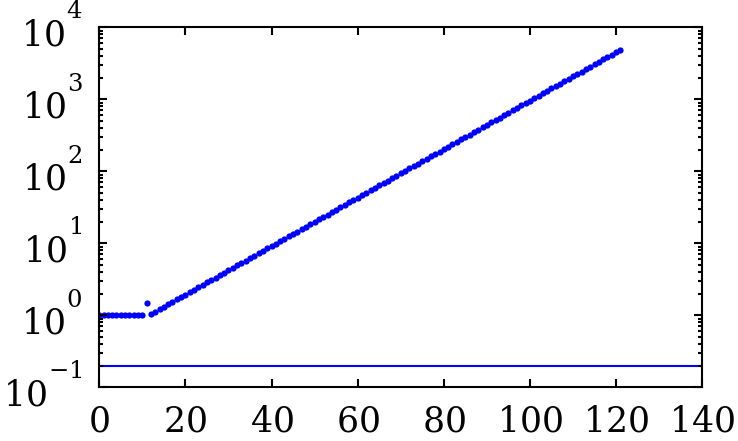

In [35]:
fig, ax = plt.subplots()
ax.axhline(df)
ax.semilogy(np.diff(bins) / df, '.')

In [36]:
indices = np.digitize(f, bins)

In [37]:
c = np.array([np.sum(indices == k) for k in range(1, bins.size)])
bz = np.array([z[indices == k].mean() for k in range(1, bins.size)])
bf = np.array([f[indices == k].mean() for k in range(1, bins.size)])


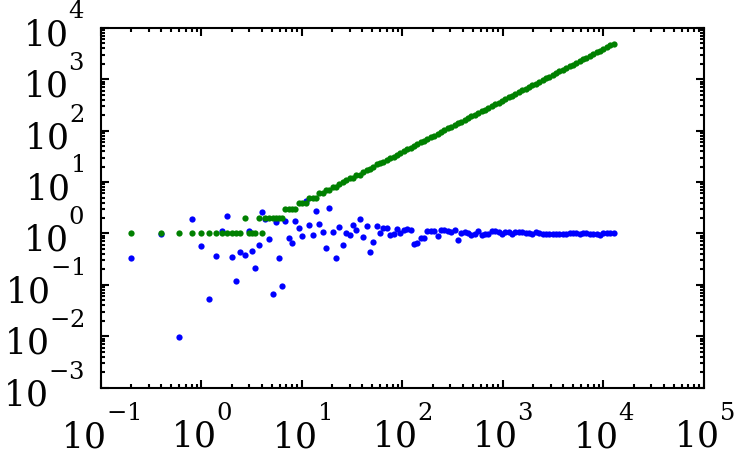

In [38]:
fig, ax = plt.subplots()
ax.loglog(bf, bz, '.')
ax.loglog(bf, c, '.')